## Explore basic Julia Plots

Packages added (using Pkg, Pkg.add("...")):
1. Plots (GeometryBasics, FFMPEG)
2. InstantiateFromURL
3. StatsPlots
4. DataFrames
5. RDatasets (iris dataset etc)

In [3]:
using Plots
gr()

Plots.GRBackend()

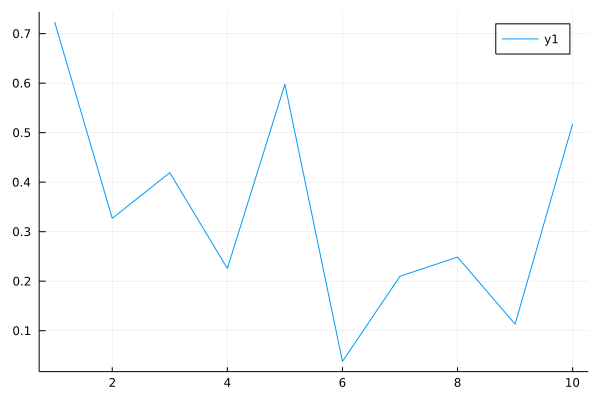

In [4]:
x = 1:10; y = rand(10)
plot(x, y)

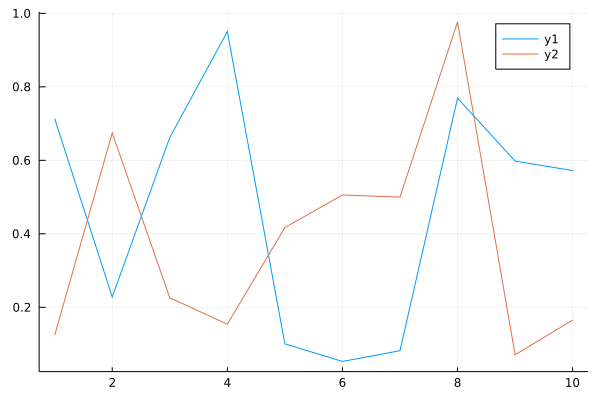

In [6]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
plot(x, y)

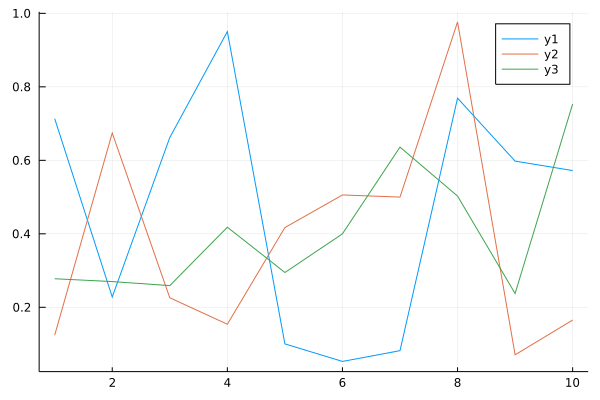

In [7]:
z = rand(10)
plot!(x, z)

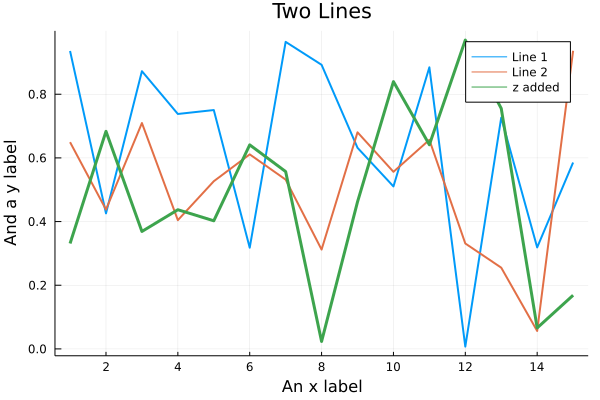

In [5]:
x = 1:15; y = rand(15, 2) # 2 columns means two lines
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 2)
xlabel!("An x label")
ylabel!("And a y label")
z = rand(15, 1)
plot!(x, z, label = "z added", lw=3)

In [6]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
plotly() # Set the backend to Plotly
# This plots into the web browser via Plotly
plot(x, y, title = "This is Plotted using Plotly")


┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /Users/felixc/.julia/packages/Plots/vVVub/src/backends.jl:372


<!DOCTYPE html>
 
 
 Plots.jl

In [21]:
# Pkg.add("StatsPlots")
using StatsPlots # Required for the DataFrame user recipe
# Now let's create the DataFrame
using DataFrames
df = DataFrame(a = 1:10, b = 10 * rand(10), c = 10 * rand(10))
# Plot the DataFrame by declaring the points by the column names
@df df plot(:a, [:b :c]) # x = :a, y = [:b :c]. Notice this is two columns!

<!DOCTYPE html>
 
 
 Plots.jl

In [27]:
@df df scatter(:a, :b, title = "My DataFrame Scatter Plot!") 

<!DOCTYPE html>
 
 
 Plots.jl

In [22]:
type(Normal(3, 5))

LoadError: UndefVarError: type not defined

In [24]:
using Distributions
plot(Normal(2, 0.5), lw = 3)

<!DOCTYPE html>
 
 
 Plots.jl

In [25]:
y = rand(10, 4)
plot(x, y, layout = (4, 1))

<!DOCTYPE html>
 
 
 Plots.jl

In [26]:
p1 = plot(x, y) # Make a line plot
p2 = scatter(x, y) # Make a scatter plot
p3 = plot(x, y, xlabel = "This one is labelled", lw = 3, title = "Subtitle")
p4 = histogram(x, y) # Four histograms each with 10 points? Why not!
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

<!DOCTYPE html>
 
 
 Plots.jl

In [33]:
using RDatasets, StatsPlots
iris = dataset("datasets", "iris")
@df iris marginalhist(:PetalLength, :PetalWidth)

<!DOCTYPE html>
 
 
 Plots.jl

In [29]:
y = rand(100, 4) # Four series of 100 points each
violin(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

<!DOCTYPE html>
 
 
 Plots.jl

In [32]:
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4"], y, leg = false)

<!DOCTYPE html>
 
 
 Plots.jl

In [7]:
n = 100
x, y = range(0, 1, length = n), randn(n, 3)

(0.0:0.010101010101010102:1.0, [-0.8176450486814757 -0.20515616787072277 -2.096636405622379; 0.6179896605364298 -0.40688897059263407 2.449282716711145; … ; 0.008712031980048406 -1.4049296382520138 1.1312202699074605; 0.4673900783965218 1.8645050482447592 -0.3370787916085091])

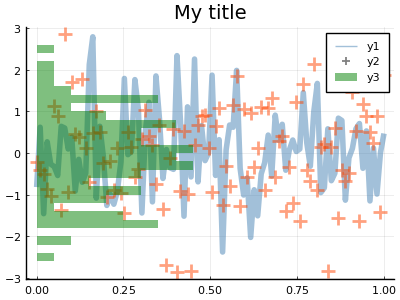

In [14]:
using Plots; pyplot(size = (400, 300))
plot(
    x, y,
    line = (0.5, [4 1 0], [:path :scatter :histogram]),
    normalize = true,
    bins = 30,
    marker = (10, 0.5, [:none :+ :none]),
    markerstrokewidth = 2,
    color = [:steelblue :orangered :green],
    fill = 0.5,
    orientation = [:v :v :h],
    title = "My title",
)

In [18]:
using StatsBase
using Distributions
using StatsPlots
gr()

Plots.GRBackend()

old histgram version:

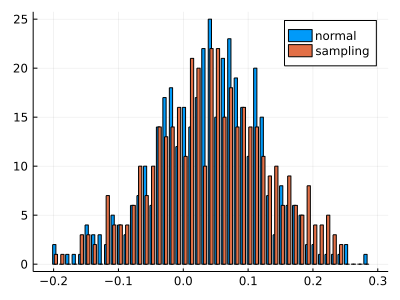

In [20]:
mu_1 = 0.04
std_1 = 0.08
dist_1 = Normal(mu_1, std_1)
r_asset = rand(dist_1, (400))

mu_target = 0.043
std_target = 0.0921
dist = Normal(mu_target, std_target)
r_normal = rand(dist, (400))

bins = minimum(r_asset) : 0.01: maximum(r_asset)
histogram(r_asset, bins=bins, bar_width=0.005, label="normal")
mu_test = mu_target
var_test = std_target
r_normal = rand(Normal(mu_test, var_test), length(r_asset))
histogram!(r_normal, bins=bins.+0.0025, bar_width=0.005, label="sampling")

new histogram: looks much nicer, but unexpected behavior of "bins"

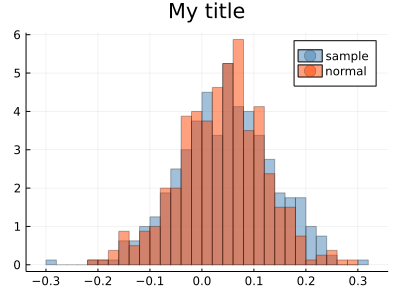

In [70]:
x, y = range(0, 1, length = length(r_asset)), hcat(r_normal, r_asset) # randn(n, 2)
plot(
    x, y,
    line = (0.3, [1 1], [:histogram :histogram]),
    normalize = true,
    bins = 30,
    marker = (10, 0.5),
    markerstrokewidth = 1,
    color = [:steelblue :orangered],
    fill = 0.5,
    labels = ["sample" "normal"],
    orientation = [:v :v],
    title = "My title",
)